In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.concat( pd.read_excel("C:/Users/Chinmay/Downloads/imus+(2).xlsx" , sheet_name = None),ignore_index=True)

In [120]:
df.head()

category                manufacturer part_number     sku alt_sku  \
0      1539  MS-OPEN VALUE SUBSCRIPTION   021-09108  BA0011     NaN   
1      1539  MS-OPEN VALUE SUBSCRIPTION   059-07014  BA0025     NaN   
2      1539  MS-OPEN VALUE SUBSCRIPTION   065-06444  BA0039     NaN   
3      1539  MS-OPEN VALUE SUBSCRIPTION   076-04355  BA0067     NaN   
4      1582  MS-OPEN VALUE SUBSCRIPTION   077-05318  BA0080     NaN   

                            description    status  qty   price sku_create_date  
0  1YR OFFICESTD ALNG LICSAPK OLV, D AP  No Stock    0  143.58      2020-08-17  
1       1YR WORD ALNG LICSAPK OLV D AP,  No Stock    0   56.09      2020-08-17  
2      1YR EXCEL ALNG LICSAPK OLV D AP,  No Stock    0   56.09      2020-08-17  
3      1YR PRJCT ALNG LICSAPK OLV D AP,  No Stock    0  217.60      2020-08-17  
4     1YR ACCESS ALNG LICSAPK OLV D, AP  No Stock    0   56.09      2020-08-17

In [3]:
df.dtypes


category                    int64
manufacturer               object
part_number                object
sku                        object
alt_sku                    object
description                object
status                     object
qty                         int64
price                     float64
sku_create_date    datetime64[ns]
dtype: object

In [4]:
df.describe()

category           qty         price
count  2.627926e+06  2.627926e+06  2.627926e+06
mean   2.379739e+03  4.138502e+01  1.882534e+03
std    2.776633e+03  5.802069e+02  8.202102e+04
min    1.000000e+00  0.000000e+00  0.000000e+00
25%    7.010000e+02  0.000000e+00  2.108000e+01
50%    1.535000e+03  0.000000e+00  9.531000e+01
75%    2.240000e+03  2.000000e+00  4.998400e+02
max    9.999000e+03  6.006300e+04  8.497453e+07

In [5]:
#remove due to all empty value
df.drop(['alt_sku'],axis=1,inplace=True)

In [6]:
df.drop_duplicates(keep = False, inplace = True)
 

In [7]:
df['date']=pd.DatetimeIndex(df['sku_create_date']).day
df['date']=df['date'].astype('int32')
df.head()

category                manufacturer part_number     sku  \
0      1539  MS-OPEN VALUE SUBSCRIPTION   021-09108  BA0011   
1      1539  MS-OPEN VALUE SUBSCRIPTION   059-07014  BA0025   
2      1539  MS-OPEN VALUE SUBSCRIPTION   065-06444  BA0039   
3      1539  MS-OPEN VALUE SUBSCRIPTION   076-04355  BA0067   
4      1582  MS-OPEN VALUE SUBSCRIPTION   077-05318  BA0080   

                            description    status  qty   price  \
0  1YR OFFICESTD ALNG LICSAPK OLV, D AP  No Stock    0  143.58   
1       1YR WORD ALNG LICSAPK OLV D AP,  No Stock    0   56.09   
2      1YR EXCEL ALNG LICSAPK OLV D AP,  No Stock    0   56.09   
3      1YR PRJCT ALNG LICSAPK OLV D AP,  No Stock    0  217.60   
4     1YR ACCESS ALNG LICSAPK OLV D, AP  No Stock    0   56.09   

  sku_create_date  date  
0      2020-08-17    17  
1      2020-08-17    17  
2      2020-08-17    17  
3      2020-08-17    17  
4      2020-08-17    17

In [8]:
df.shape

(907874, 10)

In [9]:
#categorise products are in stock
df1=df.loc[df['status'] == "In Stock"]
#create a new column 
df1['sales'] = df1['price'] * df1['qty']

<ipython-input-9-ec862fc3d113>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sales'] = df1['price'] * df1['qty']


In [10]:
df1.shape

(113096, 11)

In [11]:
df1.head(10)

category                    manufacturer         part_number     sku  \
253      9920  CASE LOGIC-PERSONAL & PORTABLE             3200943  BA6371   
271       531                OMNITRON SYSTEMS              7206-0  BA6834   
320      9070         ZEBRA ENTERPRISE MCD-A1       SAC5070-800CR  BC0227   
324      9080         ZEBRA ENTERPRISE MCD-A1  KT-CLMPT-RS507-01R  BC0232   
326      9080         ZEBRA ENTERPRISE MCD-A1    KT-PAD-RS507-10R  BC0234   
327      9080         ZEBRA ENTERPRISE MCD-A1  KT-STRPT-RS507-10R  BC0235   
328      9080         ZEBRA ENTERPRISE MCD-A1    KT-BKL-RS507-10R  BC0237   
330      9045                       MAGTEK NR            22523009  BC0283   
335      9070         ZEBRA ENTERPRISE MCD-A1           WA3017-G2  BC0389   
339      9070         ZEBRA ENTERPRISE MCD-A1        11-08062-02R  BC0437   

                                           description    status  qty   price  \
253  LAPTOP ROLLING CASE BLACK, SECURITY FRIENDLY 17IN  In Stock    7   99.00   
271  1000BASE-SX SFP LC/MM/DF 850NM, 550M PLUGGABLE...  In Stock    2   59.09   
320  RS507 8SLOT BATTERY CHARGE KIT, EXT PWR SUPL/U...  In Stock    3  500.06   
324  RS507 TRIGGER SWIVEL DOES NOT, INCLUDE STRAP/B...  In Stock  115   86.34   
326                      10 CT COMFORT PADS FOR RS507,  In Stock   42   51.80   
327  10PK REPL STRAPS FOR RS507, MANUAL TRIGGERED C...  In Stock  172   45.59   
328                     10 CT STRAP BUCKELS FOR RS507,  In Stock    4   17.96   
330  MINIMICR USB KYBD EMULATION, INCLUDES POWER SP...  In Stock   21  193.70   
335                   DOOR FOR HIGH CAP BATT 7527C-G2,  In Stock    3   12.43   
339  UNIV BELT FOR HOLSTER MC30 MC90, MC9190-G MC31...  In Stock   40   25.56   

    sku_create_date  date    sales  
253      2020-08-17    17   693.00  
271      2020-08-17    17   118.18  
320      2020-08-17    17  1500.18  
324      2020-08-17    17  9929.10  
326      2020-08-17    17  2175.60  
327      2020-08-17    17  7841.48  
328      2020-08-17    17    71.84  
330      2020-08-17    17  4067.70  
335      2020-08-17    17    37.29  
339      2020-08-17    17  1022.40

In [12]:
df2 =df1.groupby('manufacturer')['price'].sum()
df3 = df2.sort_values(ascending=False)
a=df3.head(5)
a

manufacturer
SONICWALL - HARDWARE      1292944.60
HPE - SWITCHING           1266722.25
MELLANOX TECHNOLOGIES      854188.02
LENOVO PREMIUM             778036.26
HP INC. - SB NOTEBOOKS     756680.24
Name: price, dtype: float64

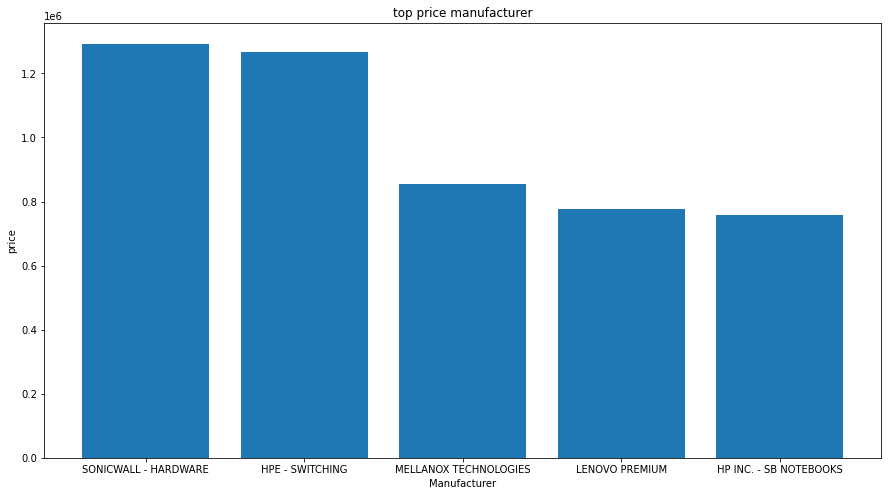

In [13]:
plt.figure(figsize=(15,8))
x=list(a.index)
y=list(a.values)
plt.xlabel('Manufacturer')
plt.ylabel('price')
plt.title('top price manufacturer')
plt.bar(x,y)
plt.show()

In [14]:
df2 =df1.groupby('manufacturer')['qty'].sum()
df4 = df2.sort_values(ascending=False)
b=df4.head(5)
b

manufacturer
DELL CSG SERVICE WARRANTIES      13578833
CONFIG 6                          3825896
DELL ESG WARRANTIES               3149689
STARTECH.COM                       939904
HP INC. - SB DESKTOP DISPLAYS      905072
Name: qty, dtype: int64

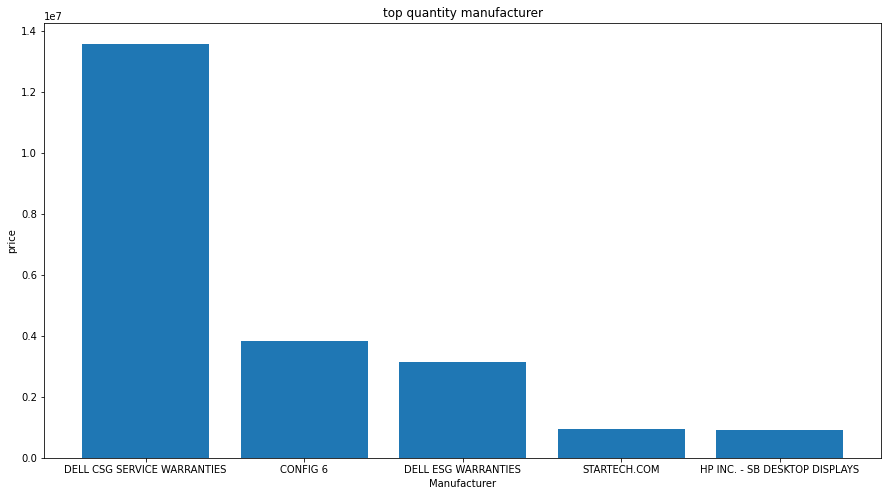

In [15]:
plt.figure(figsize=(15,8))
x=list(b.index)
y=list(b.values)
plt.xlabel('Manufacturer')
plt.ylabel('price')
plt.title('top quantity manufacturer')
plt.bar(x,y)
plt.show()

In [16]:
df2 =df1.groupby('manufacturer')['sales'].sum()
df5 = df2.sort_values(ascending=False)
c=df5.head(5)
c

manufacturer
DELL CSG SERVICE WARRANTIES      2.308292e+09
DELL ESG WARRANTIES              2.010732e+09
HP INC. - SB NOTEBOOKS           2.492580e+08
MICROSOFT- ESD                   1.588981e+08
HP INC. - SB DESKTOP DISPLAYS    1.475695e+08
Name: sales, dtype: float64

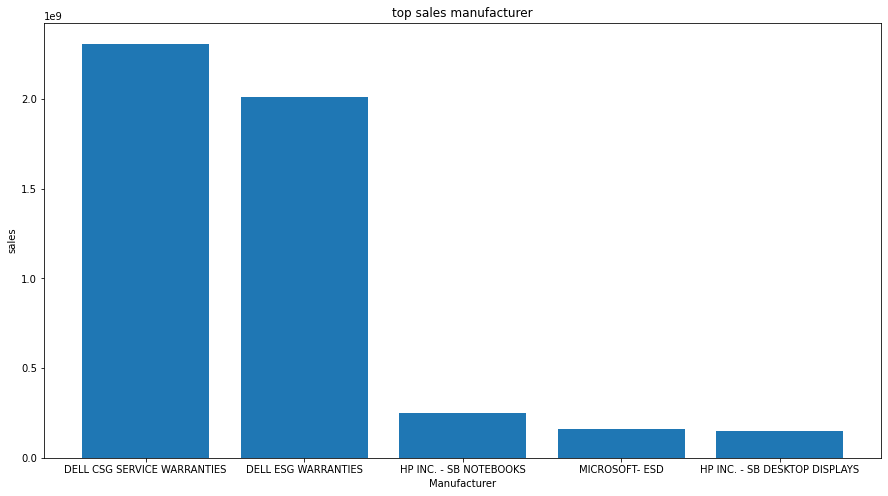

In [17]:
plt.figure(figsize=(15,8))
x=list(c.index)
y=list(c.values)
plt.xlabel('Manufacturer')
plt.ylabel('sales')
plt.title('top sales manufacturer')
plt.bar(x,y)
plt.show()

### Top Manufacturers with Price , Quantity

In [18]:
#inner merge
df6 = pd.merge(df3,df4,on='manufacturer',how="left")
e=df6.head(10)
e

price     qty
manufacturer                                           
SONICWALL - HARDWARE                 1292944.60   30801
HPE - SWITCHING                      1266722.25   46916
MELLANOX TECHNOLOGIES                 854188.02   52165
LENOVO PREMIUM                        778036.26   30208
HP INC. - SB NOTEBOOKS                756680.24  152039
AXIS COMMUNICATION INC                739877.77   71006
TRIPP LITE MASTER-POWER               722165.09  304114
LENOVO TOPSELLER THINKSTATION         665308.51    8600
APC SCHNEIDER ELECTRIC IT CONTAINER   619920.37  242984
HPE - BUSINESS CLASS STORAGE          536475.55    1689

In [19]:

#most profitable products according sales
ss=df1.groupby('date').sum()
ss.sort_values(['sales'],ascending=False)

category      qty       price         sales
date                                             
17    79504042  9671442  6469215.17  1.796269e+09
26    33502716  6810272  2923008.06  1.787039e+09
24    78333473  9567689  6258281.80  1.772176e+09
19    25127025  1728539  2180012.98  2.687843e+08
21    27383609  1782798  2319739.12  2.631063e+08
20    27441540  1740555  2342502.26  2.521369e+08
27    26709998  1760939  2234317.18  2.485110e+08
18    26378479  1572458  1957681.73  2.307562e+08
28    25938899  1700614  2121141.85  2.247782e+08
25    28468502  1568951  2159385.54  2.182694e+08

<AxesSubplot:xlabel='category'>

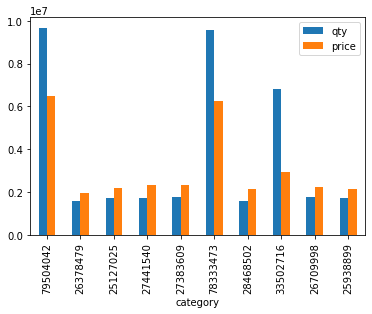

In [22]:
#top category by price and quantity
ss.plot(x="category", y=["qty", "price"], kind="bar")

<AxesSubplot:xlabel='manufacturer'>

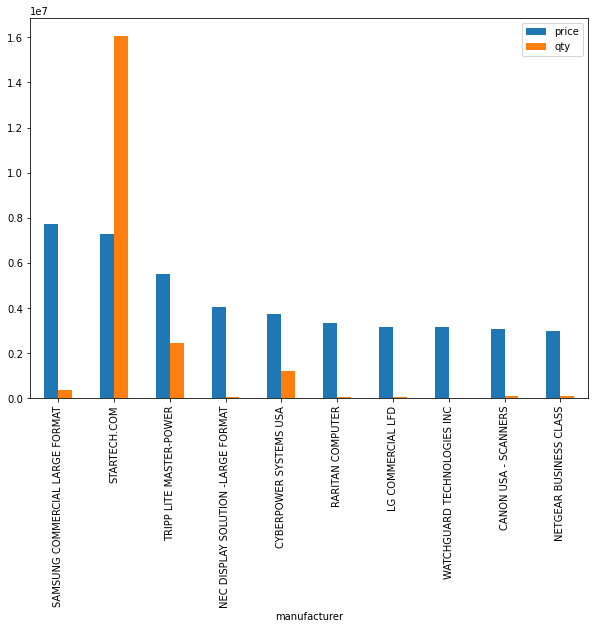

In [132]:
e.plot(kind='bar',figsize=(10,7))

In [48]:
Piv = df1.pivot_table(index=['part_number','price'],columns = ['sku_create_date'],values='qty',aggfunc=np.sum)
Piv.head(10)

sku_create_date          2020-08-17  2020-08-18  2020-08-19  2020-08-20  \
part_number      price                                                    
0-00496          59.62         36.0         NaN         NaN         NaN   
0-00498          96.65         10.0         NaN         NaN         NaN   
003-000884-01-OE 398.68         2.0         NaN         NaN         NaN   
00385            1.80           1.0         NaN         NaN         NaN   
00388            2.48           1.0         NaN         NaN         NaN   
00392            1.20          12.0         NaN         NaN         NaN   
00394            1.80         175.0       156.0         NaN         NaN   
00397            2.48           1.0         NaN         NaN         NaN   
00398            3.79           1.0         NaN         NaN         NaN   
00401            1.28          47.0         NaN        36.0         NaN   

sku_create_date          2020-08-21  2020-08-24  2020-08-25  2020-08-26  \
part_number      price                                                    
0-00496          59.62          NaN        36.0         NaN         NaN   
0-00498          96.65          NaN         NaN         NaN         NaN   
003-000884-01-OE 398.68         NaN         2.0         NaN         NaN   
00385            1.80           NaN         1.0         NaN         NaN   
00388            2.48           NaN         1.0         NaN         NaN   
00392            1.20           NaN        12.0         NaN         NaN   
00394            1.80           NaN       156.0         NaN         NaN   
00397            2.48           NaN         1.0         NaN         NaN   
00398            3.79           NaN         1.0         NaN         NaN   
00401            1.28           NaN        36.0        31.0         NaN   

sku_create_date          2020-08-27  2020-08-28  
part_number      price                           
0-00496          59.62          NaN         NaN  
0-00498          96.65          NaN         NaN  
003-000884-01-OE 398.68         NaN         NaN  
00385            1.80           NaN         NaN  
00388            2.48           NaN         NaN  
00392            1.20           NaN         NaN  
00394            1.80           NaN       158.0  
00397            2.48           NaN         NaN  
00398            3.79           NaN         NaN  
00401            1.28          19.0         NaN

In [49]:
#nan to zero
dec.fillna(0,inplace=True)

In [50]:
df7 = [df6,df5]
pd.merge(df6,df5,on='manufacturer',how='right')

price       qty         sales
manufacturer                                                     
DELL CSG SERVICE WARRANTIES     150917.91  13578833  2.308292e+09
DELL ESG WARRANTIES             173018.32   3149689  2.010732e+09
HP INC. - SB NOTEBOOKS          756680.24    152039  2.492580e+08
MICROSOFT- ESD                    7200.08    529951  1.588981e+08
HP INC. - SB DESKTOP DISPLAYS    54691.38    905072  1.475695e+08
...                                   ...       ...           ...
NCOMPUTING GLOBAL INC               69.36         2  6.936000e+01
ZAGG - BRAVEN                       63.26         2  6.326000e+01
TROY JAMES BOYS                     28.76         2  2.876000e+01
KINEMATICS GMBH DBA TINKERBOTS      24.30         2  2.430000e+01
CONFIG 1                             0.00       144  0.000000e+00

[787 rows x 3 columns]

In [51]:
#drop all rows where 2020-08-28 is zero
Piv.drop(Piv.loc[Piv['2020-08-28']==0].index,inplace=True)
Piv.head()

sku_create_date          2020-08-17  2020-08-18  2020-08-19  2020-08-20  \
part_number      price                                                    
0-00496          59.62         36.0         NaN         NaN         NaN   
0-00498          96.65         10.0         NaN         NaN         NaN   
003-000884-01-OE 398.68         2.0         NaN         NaN         NaN   
00385            1.80           1.0         NaN         NaN         NaN   
00388            2.48           1.0         NaN         NaN         NaN   

sku_create_date          2020-08-21  2020-08-24  2020-08-25  2020-08-26  \
part_number      price                                                    
0-00496          59.62          NaN        36.0         NaN         NaN   
0-00498          96.65          NaN         NaN         NaN         NaN   
003-000884-01-OE 398.68         NaN         2.0         NaN         NaN   
00385            1.80           NaN         1.0         NaN         NaN   
00388            2.48           NaN         1.0         NaN         NaN   

sku_create_date          2020-08-27  2020-08-28  
part_number      price                           
0-00496          59.62          NaN         NaN  
0-00498          96.65          NaN         NaN  
003-000884-01-OE 398.68         NaN         NaN  
00385            1.80           NaN         NaN  
00388            2.48           NaN         NaN

In [52]:
Piv["Total_qty"] = Piv["2020-08-17"] - Piv["2020-08-28"]
#convert price index to a column
Piv.reset_index(inplace=True)
#drop NaN in Total_qty
Piv.dropna(subset=['Total_qty'],inplace=True)
Piv.head()

sku_create_date part_number   price  2020-08-17 00:00:00  2020-08-18 00:00:00  \
6                     00394    1.80                175.0                156.0   
10                    00403    1.80                123.0                  NaN   
35                    00691    5.65                 22.0                  NaN   
115               008R12941   86.71                 15.0                  NaN   
116               008R12964  127.43                 12.0                 11.0   

sku_create_date  2020-08-19 00:00:00  2020-08-20 00:00:00  \
6                                NaN                  NaN   
10                               NaN                  NaN   
35                               NaN                  NaN   
115                              NaN                  NaN   
116                              NaN                 10.0   

sku_create_date  2020-08-21 00:00:00  2020-08-24 00:00:00  \
6                                NaN                156.0   
10                               NaN                106.0   
35                               NaN                 22.0   
115                             20.0                 20.0   
116                              NaN                 10.0   

sku_create_date  2020-08-25 00:00:00  2020-08-26 00:00:00  \
6                                NaN                  NaN   
10                              99.0                102.0   
35                               NaN                  NaN   
115                              NaN                 18.0   
116                              NaN                  NaN   

sku_create_date  2020-08-27 00:00:00  2020-08-28 00:00:00  Total_qty  
6                                NaN                158.0       17.0  
10                               NaN                105.0       18.0  
35                               NaN                 18.0        4.0  
115                             17.0                 15.0        0.0  
116                              NaN                 10.0        2.0

In [54]:
#group by part_number and sum the qty and price
Piv1 = Piv.groupby('part_number')['Total_qty','price'].sum()

<ipython-input-54-54b0c829457e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Piv1 = Piv.groupby('part_number')['Total_qty','price'].sum()


In [55]:
Piv1["Profit"] = Piv1['Total_qty'] * Piv1['price']

### Most Profitable Products

In [56]:
#sort by profit
Piv1 = Piv1.sort_values(by=['Profit'],ascending=False)
Piv1.head()

sku_create_date  Total_qty    price      Profit
part_number                                    
P00924-B21          2096.0   954.00  1999584.00
7KK07UT#ABA          775.0  1537.02  1191190.50
1FH49A8#ABA         4972.0   230.74  1147239.28
1FH47A8#ABA         6721.0   159.47  1071797.87
7KK32UT#ABA          508.0  1840.92   935187.36

In [57]:
pivot = df1.pivot_table(index=['part_number','price'],columns = ['sku_create_date'],values='qty',aggfunc=np.sum)
pivot.head()

sku_create_date          2020-08-17  2020-08-18  2020-08-19  2020-08-20  \
part_number      price                                                    
0-00496          59.62         36.0         NaN         NaN         NaN   
0-00498          96.65         10.0         NaN         NaN         NaN   
003-000884-01-OE 398.68         2.0         NaN         NaN         NaN   
00385            1.80           1.0         NaN         NaN         NaN   
00388            2.48           1.0         NaN         NaN         NaN   

sku_create_date          2020-08-21  2020-08-24  2020-08-25  2020-08-26  \
part_number      price                                                    
0-00496          59.62          NaN        36.0         NaN         NaN   
0-00498          96.65          NaN         NaN         NaN         NaN   
003-000884-01-OE 398.68         NaN         2.0         NaN         NaN   
00385            1.80           NaN         1.0         NaN         NaN   
00388            2.48           NaN         1.0         NaN         NaN   

sku_create_date          2020-08-27  2020-08-28  
part_number      price                           
0-00496          59.62          NaN         NaN  
0-00498          96.65          NaN         NaN  
003-000884-01-OE 398.68         NaN         NaN  
00385            1.80           NaN         NaN  
00388            2.48           NaN         NaN

In [58]:
pivot.groupby('part_number')
pivot.fillna(0,inplace=True)

In [59]:
pivot["New"] = pivot["2020-08-17"] - pivot["2020-08-18"] - pivot["2020-08-19"] - pivot["2020-08-20"] - pivot["2020-08-21"] -  pivot["2020-08-24"] - pivot["2020-08-25"] - pivot["2020-08-26"] - pivot["2020-08-27"] - pivot["2020-08-28"]

### Products decreasing price

In [60]:
pivot3 = pivot["New"]
#drop 0 values
pivot3.drop(pivot3[pivot3 == 3].index,inplace=True)
pivot3.sort_values(ascending=False).head(5)

part_number   price 
808-3171      156.09    9999.0
808-3202      156.09    9999.0
27190-01      23.41      860.0
              24.53      860.0
UM.XV6AA.A01  62.38      769.0
Name: New, dtype: float64

### Products increasing price

In [61]:
pivot3.sort_values(ascending=True).head(5)

part_number  price 
1FH47A8#ABA  159.47   -272132.0
FEE SKU      3.00     -222528.0
808-3105     84.06    -179992.0
808-3129     267.10   -179989.0
808-3177     38.68    -179988.0
Name: New, dtype: float64

### Top category by Price and Quintity

In [62]:
df5 = df1.groupby('category')['sales'].sum()
df5.sort_values(ascending=False).head(1)

category
1221    4.377736e+09
Name: sales, dtype: float64

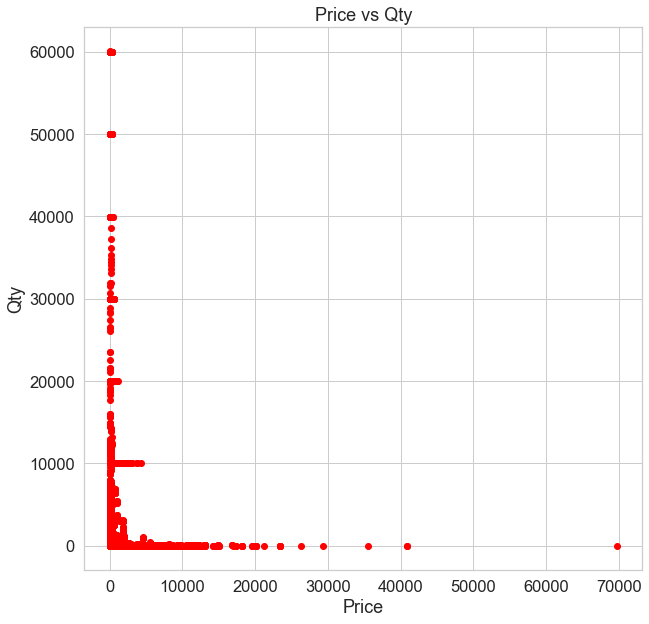

In [63]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10,10))
plt.scatter(df1['price'],df1['qty'],color='red')
plt.xlabel('Price')
plt.ylabel('Qty')
plt.title('Price vs Qty')
plt.show()

In [64]:
df1['sku_create_date'].value_counts()

2020-08-17    23456
2020-08-24    23254
2020-08-26    10381
2020-08-20     8346
2020-08-27     8244
2020-08-21     8198
2020-08-25     8184
2020-08-19     7693
2020-08-18     7673
2020-08-28     7667
Name: sku_create_date, dtype: int64

In [65]:
df6=df1.loc[df1['sku_create_date'] == "2020-08-17"]
df7=df1.loc[df1['sku_create_date'] == "2020-08-28"]

In [66]:
df8 = df6.groupby(['part_number'])['qty'].sum()
df8.sort_values( ascending=False).head(5)

part_number
FEE SKU            1811683
808-3129             59995
808-3177             59995
808-3111             59994
A4-DOCK-RELEASE      59994
Name: qty, dtype: int64

In [67]:
df9 = df7.groupby(['part_number'])['qty'].sum()
df9.sort_values( ascending=False).head(5)

part_number
808-3108       60014
803-5495       59995
808-3177       59994
808-3105       59994
1FH47A8#ABA    31913
Name: qty, dtype: int64

In [68]:
#inner merge
df10 = pd.merge(df8,df9,how='inner',on='part_number')
df10.head()

qty_x  qty_y
part_number              
00394          175    158
00403          123    105
005365         811    649
005372          45     44
00691           22     18

In [69]:
#new column (qty_x - qty_y)**2
df10['sells'] = (df10['qty_x'] - df10['qty_y'])**2

### Products which are Aging

In [70]:
df11 = df10.groupby(['part_number'])['sells'].sum()
df11.sort_values( ascending=False).tail(5)


part_number
633808920623    0
1911IER-3-N     0
C2H67A          0
676K05360       0
U326-001-BK     0
Name: sells, dtype: int64

We can see that , the sells of these products are very less from 17th to 28th ,i.e, zero.That means from starting date the sells of these products are not happening due to certain reasons.So we can simply try to decrease price of these items to increase the sells and reduce these high stocks.

# For Nostock

In [71]:
df_nostock = df.loc[df['status'] == "No Stock"]
df_nostock.head()

category                manufacturer part_number     sku  \
0      1539  MS-OPEN VALUE SUBSCRIPTION   021-09108  BA0011   
1      1539  MS-OPEN VALUE SUBSCRIPTION   059-07014  BA0025   
2      1539  MS-OPEN VALUE SUBSCRIPTION   065-06444  BA0039   
3      1539  MS-OPEN VALUE SUBSCRIPTION   076-04355  BA0067   
4      1582  MS-OPEN VALUE SUBSCRIPTION   077-05318  BA0080   

                            description    status  qty   price  \
0  1YR OFFICESTD ALNG LICSAPK OLV, D AP  No Stock    0  143.58   
1       1YR WORD ALNG LICSAPK OLV D AP,  No Stock    0   56.09   
2      1YR EXCEL ALNG LICSAPK OLV D AP,  No Stock    0   56.09   
3      1YR PRJCT ALNG LICSAPK OLV D AP,  No Stock    0  217.60   
4     1YR ACCESS ALNG LICSAPK OLV D, AP  No Stock    0   56.09   

  sku_create_date  date  
0      2020-08-17    17  
1      2020-08-17    17  
2      2020-08-17    17  
3      2020-08-17    17  
4      2020-08-17    17

In [72]:
df12 =df_nostock.groupby('manufacturer')['price'].sum()
df13 = df12.sort_values(ascending=False)
df13.head(5)

manufacturer
CISCO - CCW MULTI YEAR           7.122279e+08
ALTNET                           3.154831e+08
CITRIX - NETSCALER               2.691865e+08
FORCEPOINT SOFTWARE              2.185683e+08
VERITAS BUYING PROGRAMS - NEW    2.177701e+08
Name: price, dtype: float64

In [73]:
df14 =df_nostock.groupby('manufacturer')['qty'].sum()
df15 = df14.sort_values(ascending=False)
df15.head()

manufacturer
22MILES                          0
PHOENIX AUDIO TECHNOLOGIES       0
PANASONIC PANABOARDS             0
PANASONIC FLAT PANEL DISPLAYS    0
PANASONIC CTO                    0
Name: qty, dtype: int64

### Top Manufacturers with Price , Quantity

In [74]:
#inner merge
Top = pd.merge(df13,df15,on='manufacturer')
Top.head()

price  qty
manufacturer                                    
CISCO - CCW MULTI YEAR         7.122279e+08    0
ALTNET                         3.154831e+08    0
CITRIX - NETSCALER             2.691865e+08    0
FORCEPOINT SOFTWARE            2.185683e+08    0
VERITAS BUYING PROGRAMS - NEW  2.177701e+08    0

In [75]:
Pi = df1.pivot_table(index=['part_number','price'],columns = ['sku_create_date'],values='qty',aggfunc=np.sum)
Pi.head()

sku_create_date          2020-08-17  2020-08-18  2020-08-19  2020-08-20  \
part_number      price                                                    
0-00496          59.62         36.0         NaN         NaN         NaN   
0-00498          96.65         10.0         NaN         NaN         NaN   
003-000884-01-OE 398.68         2.0         NaN         NaN         NaN   
00385            1.80           1.0         NaN         NaN         NaN   
00388            2.48           1.0         NaN         NaN         NaN   

sku_create_date          2020-08-21  2020-08-24  2020-08-25  2020-08-26  \
part_number      price                                                    
0-00496          59.62          NaN        36.0         NaN         NaN   
0-00498          96.65          NaN         NaN         NaN         NaN   
003-000884-01-OE 398.68         NaN         2.0         NaN         NaN   
00385            1.80           NaN         1.0         NaN         NaN   
00388            2.48           NaN         1.0         NaN         NaN   

sku_create_date          2020-08-27  2020-08-28  
part_number      price                           
0-00496          59.62          NaN         NaN  
0-00498          96.65          NaN         NaN  
003-000884-01-OE 398.68         NaN         NaN  
00385            1.80           NaN         NaN  
00388            2.48           NaN         NaN

In [76]:
#nan to zero
Pi.fillna(0,inplace=True)

In [77]:
Pi.loc[Pi['2020-08-28']==0]

sku_create_date           2020-08-17  2020-08-18  2020-08-19  2020-08-20  \
part_number      price                                                     
0-00496          59.62          36.0         0.0         0.0         0.0   
0-00498          96.65          10.0         0.0         0.0         0.0   
003-000884-01-OE 398.68          2.0         0.0         0.0         0.0   
00385            1.80            1.0         0.0         0.0         0.0   
00388            2.48            1.0         0.0         0.0         0.0   
...                              ...         ...         ...         ...   
ZT62062-T01A100Z 4001.17         1.0         0.0         0.0         0.0   
ZT62063-T010100Z 3797.41        11.0         0.0         0.0         0.0   
ZT62063-T01A100Z 4140.69        10.0         0.0         0.0         0.0   
ZT62063-T110100Z 4344.44         6.0         0.0         0.0         0.0   
ZUCUBJCK         16.74           2.0         0.0         0.0         0.0   

sku_create_date           2020-08-21  2020-08-24  2020-08-25  2020-08-26  \
part_number      price                                                     
0-00496          59.62           0.0        36.0         0.0         0.0   
0-00498          96.65           0.0         0.0         0.0         0.0   
003-000884-01-OE 398.68          0.0         2.0         0.0         0.0   
00385            1.80            0.0         1.0         0.0         0.0   
00388            2.48            0.0         1.0         0.0         0.0   
...                              ...         ...         ...         ...   
ZT62062-T01A100Z 4001.17         0.0         1.0         0.0         0.0   
ZT62063-T010100Z 3797.41         0.0        19.0        21.0         0.0   
ZT62063-T01A100Z 4140.69         0.0        10.0         0.0         0.0   
ZT62063-T110100Z 4344.44         0.0         6.0         0.0         0.0   
ZUCUBJCK         16.74           0.0         2.0         0.0         0.0   

sku_create_date           2020-08-27  2020-08-28  
part_number      price                            
0-00496          59.62           0.0         0.0  
0-00498          96.65           0.0         0.0  
003-000884-01-OE 398.68          0.0         0.0  
00385            1.80            0.0         0.0  
00388            2.48            0.0         0.0  
...                              ...         ...  
ZT62062-T01A100Z 4001.17         0.0         0.0  
ZT62063-T010100Z 3797.41         0.0         0.0  
ZT62063-T01A100Z 4140.69         0.0         0.0  
ZT62063-T110100Z 4344.44         0.0         0.0  
ZUCUBJCK         16.74           0.0         0.0  

[27637 rows x 10 columns]

In [78]:
Pi["Total_qty"] = Pi['2020-08-17'] - Pi['2020-08-28']

In [79]:
Pi.reset_index(inplace=True)
Pi.head()

sku_create_date       part_number   price  2020-08-17 00:00:00  \
0                         0-00496   59.62                 36.0   
1                         0-00498   96.65                 10.0   
2                003-000884-01-OE  398.68                  2.0   
3                           00385    1.80                  1.0   
4                           00388    2.48                  1.0   

sku_create_date  2020-08-18 00:00:00  2020-08-19 00:00:00  \
0                                0.0                  0.0   
1                                0.0                  0.0   
2                                0.0                  0.0   
3                                0.0                  0.0   
4                                0.0                  0.0   

sku_create_date  2020-08-20 00:00:00  2020-08-21 00:00:00  \
0                                0.0                  0.0   
1                                0.0                  0.0   
2                                0.0                  0.0   
3                                0.0                  0.0   
4                                0.0                  0.0   

sku_create_date  2020-08-24 00:00:00  2020-08-25 00:00:00  \
0                               36.0                  0.0   
1                                0.0                  0.0   
2                                2.0                  0.0   
3                                1.0                  0.0   
4                                1.0                  0.0   

sku_create_date  2020-08-26 00:00:00  2020-08-27 00:00:00  \
0                                0.0                  0.0   
1                                0.0                  0.0   
2                                0.0                  0.0   
3                                0.0                  0.0   
4                                0.0                  0.0   

sku_create_date  2020-08-28 00:00:00  Total_qty  
0                                0.0       36.0  
1                                0.0       10.0  
2                                0.0        2.0  
3                                0.0        1.0  
4                                0.0        1.0

In [80]:
#group by part_number and sum the qty and price
Pi1 = Pi.groupby('part_number')['Total_qty','price'].sum()

<ipython-input-80-c7f95c0b851a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Pi1 = Pi.groupby('part_number')['Total_qty','price'].sum()


In [81]:
Pi1["Profit"] = Pi1["Total_qty"] * Pi1["price"]

### Most Profitable Products

In [82]:
Pi1.sort_values(by=['Profit'],ascending=False)
#drop sku_create_date
Pi1.drop(Pi1.columns[0],axis=1,inplace=True)
Pi1.head()

sku_create_date    price   Profit
part_number                      
0-00496            59.62  2146.32
0-00498            96.65   966.50
003-000884-01-OE  398.68   797.36
00385               1.80     1.80
00388               2.48     2.48

In [83]:
#groupby part_number
df16 = df_nostock.groupby('part_number')['price'].sum()
df16.sort_values( ascending=False).head(5)


part_number
ALT-TPM-240000000     1.699491e+08
ALT-TPM-80000000      5.664969e+07
SV5-SWA-JCE-1KGBPS    2.089800e+07
CON-3ECMU-LTCLX3UL    2.086371e+07
CON-3ECMU-LTCAEEX3    1.987020e+07
Name: price, dtype: float64

In [84]:
pivot1 = df_nostock.pivot_table(index=['part_number'],columns = ['sku_create_date'],values='price',aggfunc=np.sum)

In [85]:
#sort the values in the pivot table
pivot1.sort_values(by = '2020-08-17',ascending=False,inplace=True)

In [86]:
#groupby part_number of pivot1
df17 = pivot1.groupby('part_number')


In [87]:
#conver nan to 0
pivot1.fillna(0,inplace=True)

In [88]:
pivot1["New"] = pivot1["2020-08-17"] - pivot1["2020-08-18"] - pivot1["2020-08-19"] - pivot1["2020-08-20"] - pivot1["2020-08-21"] -  pivot1["2020-08-24"] - pivot1["2020-08-25"] - pivot1["2020-08-26"] - pivot1["2020-08-27"] - pivot1["2020-08-28"]
pivot1

sku_create_date     2020-08-17 00:00:00  2020-08-18 00:00:00  \
part_number                                                    
ALT-TPM-240000000           84974533.10                  0.0   
ALT-TPM-80000000            28324844.37                  0.0   
SV5-SWA-JCE-1KGBPS          10449000.00                  0.0   
CON-3ECMU-LTCLX3UL           8521380.00                  0.0   
CON-3ECMU-LTCAEEX3           8115600.00                  0.0   
...                                 ...                  ...   
ZT61046-T010200Z                   0.00                  0.0   
ZVC300-C0-A00                      0.00                  0.0   
ZVC500-C0-A00                      0.00                  0.0   
ZVC800-C0-800                      0.00                  0.0   
ZVC800-C2-310                      0.00                  0.0   

sku_create_date     2020-08-19 00:00:00  2020-08-20 00:00:00  \
part_number                                                    
ALT-TPM-240000000                  0.00                  0.0   
ALT-TPM-80000000                   0.00                  0.0   
SV5-SWA-JCE-1KGBPS                 0.00                  0.0   
CON-3ECMU-LTCLX3UL                 0.00                  0.0   
CON-3ECMU-LTCAEEX3                 0.00                  0.0   
...                                 ...                  ...   
ZT61046-T010200Z                3418.22                  0.0   
ZVC300-C0-A00                      0.00                  0.0   
ZVC500-C0-A00                      0.00                  0.0   
ZVC800-C0-800                      0.00                  0.0   
ZVC800-C2-310                      0.00                  0.0   

sku_create_date     2020-08-21 00:00:00  2020-08-24 00:00:00  \
part_number                                                    
ALT-TPM-240000000                  0.00          84974533.10   
ALT-TPM-80000000                   0.00          28324844.37   
SV5-SWA-JCE-1KGBPS                 0.00          10449000.00   
CON-3ECMU-LTCLX3UL                 0.00           8521380.00   
CON-3ECMU-LTCAEEX3                 0.00           8115600.00   
...                                 ...                  ...   
ZT61046-T010200Z                3418.22                 0.00   
ZVC300-C0-A00                   1494.19                 0.00   
ZVC500-C0-A00                   1814.37                 0.00   
ZVC800-C0-800                   2130.02                 0.00   
ZVC800-C2-310                   2556.01                 0.00   

sku_create_date     2020-08-25 00:00:00  2020-08-26 00:00:00  \
part_number                                                    
ALT-TPM-240000000                   0.0                  0.0   
ALT-TPM-80000000                    0.0                  0.0   
SV5-SWA-JCE-1KGBPS                  0.0                  0.0   
CON-3ECMU-LTCLX3UL            3820950.0                  0.0   
CON-3ECMU-LTCAEEX3            3639000.0                  0.0   
...                                 ...                  ...   
ZT61046-T010200Z                    0.0                  0.0   
ZVC300-C0-A00                       0.0                  0.0   
ZVC500-C0-A00                       0.0                  0.0   
ZVC800-C0-800                       0.0                  0.0   
ZVC800-C2-310                       0.0                  0.0   

sku_create_date     2020-08-27 00:00:00  2020-08-28 00:00:00         New  
part_number                                                               
ALT-TPM-240000000                   0.0                  0.0        0.00  
ALT-TPM-80000000                    0.0                  0.0        0.00  
SV5-SWA-JCE-1KGBPS                  0.0                  0.0        0.00  
CON-3ECMU-LTCLX3UL                  0.0                  0.0 -3820950.00  
CON-3ECMU-LTCAEEX3                  0.0                  0.0 -3639000.00  
...                                 ...                  ...         ...  
ZT61046-T010200Z                    0.0                  0.0    -683

### Products in decreasing price

In [89]:
pivot2 = pivot1["New"]
#drop 0 values
pivot2.drop(pivot2[pivot2 == 0].index,inplace=True)
pivot2.sort_values(ascending=False).head(5)

part_number
SUP-SX6536-5G     284411.21
SUP-SX6536-5GP    199087.43
SUP-SX6518-5G     147276.30
SUP-SX6536-5S     142205.60
SUP-SX6536-5SP    104284.39
Name: New, dtype: float64

### Products  in increasing price

In [90]:
pivot2.sort_values(ascending=True).head(5)

part_number
CON-3ECMU-LTCLX3UL   -3820950.00
CON-3ECMU-LTCAEEX3   -3639000.00
CON-3ECMU-LPHOME6S   -3119143.38
CON-3ECMU-OFUL6OBL   -1910475.00
CON-3ECMU-LTCACLM3   -1910475.00
Name: New, dtype: float64

### Top Category by Price And Quantity

In [91]:
df_nostock5 = df_nostock.groupby('category')['price'].sum()
df_nostock5.sort_values(ascending=False).head(1)

category
1221    1.190726e+09
Name: price, dtype: float64

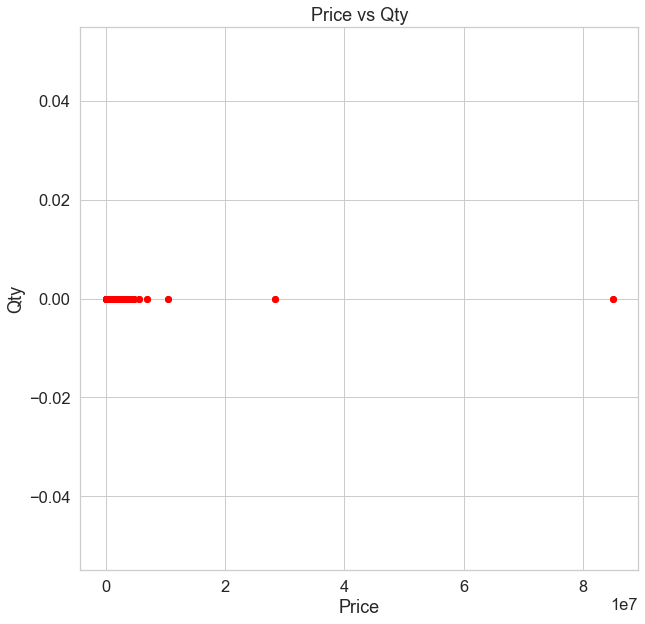

In [92]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10,10))
plt.scatter(df_nostock['price'],df_nostock['qty'],color='red')
plt.xlabel('Price')
plt.ylabel('Qty')
plt.title('Price vs Qty')
plt.show()

In [1]:
1+1

2